<div align="left">
<img src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" width="100" height="130" align="left" style="margin-right: 50px">
</div>

# Computational Methods homeworks

Homework 8

<div align="right" style="width: 99.5%;">
Estiven Castrillon
<!-- </div> -->

<div style="width: 99.5%; border-bottom: 3px solid white;"></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols

# Tarea
Graficar el polinomio de newton por interpolación de diferencias divididas para los puntos Xn, Yn dados

## Teoría
# Método de diferencias divididas


Otra manera de representar el polinomio $P_n(x)$ mediante manipulación algebraica es,

$$P_n(x) = a_0 + a_1(x-x_0)+ a_2 (x-x_0)(x-x_1)+\cdots + a_n(x-x_0)\cdots (x-x_{n-1})$$

donde los valores $a_i$ son constantes a determinar a partir de los $n+1$ puntos $(x_i, y_i)$.
Note que como por definición,

$$P_n(x_0) = a_0 = y_0,$$

ahora, si se evalua a $x_1$,

$$P_n(x_1) = a_0 + a_1(x_1-x_0) = y_0 + a_1(x_1-x_0) = y_1, $$

da,

$$a_1 = \frac{f(x_1)-f(x_0)}{x_1-x_0}.$$

Para calcular el resto de los coeficientes $a_i$ se define la diferencia dividida cero como,

$$D_0[x_i] = f(x_i) = y_i,$$

y la primera diferencia dividida de $x_i$ se define por,

$$D_1[x_i] = \frac{D_{0}[x_{i+1}]-D_{0}[x_{i}]}{x_{i+1}-x_i}, $$

en general, se define la $k$-esima diferencia dividida por,

$$D_k[x_i] = \frac{D_{k-1}[x_{i+1}]-D_{k-1}[x_{i}]}{x_{i+k}-x_i}$$

esta expresión define la siguiente secuencia,

donde la diagonal superior da,

$$a_k=D_k[x_0]= \frac{D_{k-1}[x_{1}]-D_{k-1}[x_{0}]}{x_{k}-x_0},$$

que son los coeficientes buscados, es decir que solo se necesita guardar la diagonal superior para calcular la sumatoria, los demás términos solo se usan para obtener estos valores, así el polinomio es,

$$P_n(x) = y_0 + \sum_{k=1}^n D_k[x_0] (x-x_0) \cdots (x-x_{k-1}).$$

Note también que el error del polinomio respecto de $f(x)$ es el mismo que en el caso de Lagrange.
La implementación en python mediante una función recursiva es,

In [2]:
def D(i, j, Xn, Yn):
    if i+j >= len(Xn):
        return 0
    elif j==0:
        return Yn[i]
    else:
        return (D(i+1, j-1, Xn, Yn) - D(i, j-1, Xn, Yn)) / (Xn[i+j] - Xn[i])

Xn = [1, 3, 4, 8]
Yn = [2, 3, 2, 10]

print(f'Diferencia dividida para índices i=0, j=1: {D(0, 1, Xn, Yn)}')

Diferencia dividida para índices i=0, j=1: 0.5


In [3]:
x = symbols('X')

# Puntos a interpolar
Xn = [1, 3, 4, 8]
Yn = [2, 3, 2, 10]

def polinomio_newton(x):
    polinomio = D(0, 0, Xn, Yn)
    # print(f'polinomio 00: {polinomio}')
    for z in range(1, len(Xn) + 1):
        coeficiente = D(0, z, Xn, Yn)
        for h in range(1, z+1):
            coeficiente *= (x - Xn[h-1])

        polinomio += coeficiente
        # print(f'polinomio orden {z}: {polinomio}')
    return polinomio

print(f'Polinomio de Newton para los puntos Xn, Yn: {polinomio_newton(x)}')

Polinomio de Newton para los puntos Xn, Yn: 0.5*X + (0.5 - 0.5*X)*(X - 3) + (0.157142857142857*X - 0.157142857142857)*(X - 4)*(X - 3) + 1.5


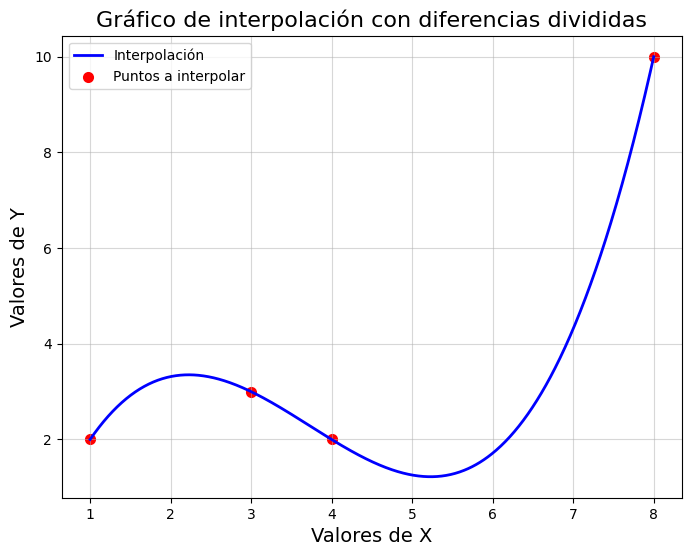

In [4]:
rango = np.linspace(1, 8, 1000)
plt.figure(figsize=(8, 6))

plt.plot(rango, polinomio_newton(rango), linewidth=2, color='b', label='Interpolación') # Gráfico de la interpoación
plt.scatter(Xn, Yn, linewidth=2, color='r', label='Puntos a interpolar') # Puntos a interpolar Xn, Yn

plt.xlabel('Valores de X', fontsize=14)
plt.ylabel('Valores de Y', fontsize=14)
plt.title('Gráfico de interpolación con diferencias divididas', fontsize=16)
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()